In [64]:
import keen
from keen.client import KeenClient
import arrow

KEEN_PROJECT_ID = "572dfdae3831443195b2f30c"
KEEN_READ_KEY = "5de7f166da2e36f6c8617347a7a729cfda6d5413db8d88d7f696b61ddaa4fe1e5cdb7d019de9bb0ac846d91e83cdac01e973585d0fba43fadf92f06a695558b890665da824a0cf6a946ac09f5746c9102d228a1165323fdd0c52c92b80e78eca"

client = KeenClient(
    project_id=KEEN_PROJECT_ID,
    read_key=KEEN_READ_KEY
)

earthquakes_by_day = client.count_unique("earthquakes",
    timeframe={
        "start": arrow.get(2016, 9, 20).format(),
        "end": arrow.get(2016, 10, 20).format()
    },
    target_property="id",
    interval="daily"
)

# This is what all the data means
# https://earthquake.usgs.gov/data/comcat/data-eventterms.php

In [65]:
# Populate y axis values - get number of earthquakes by day
earthquake_counts = list(map(lambda x: x["value"], earthquakes_by_day))

# Populate x axis values - get dates
earthquake_dates = list(
    map(lambda x: arrow.get(x["timeframe"]["start"]).format("M-DD"), earthquakes_by_day)
)

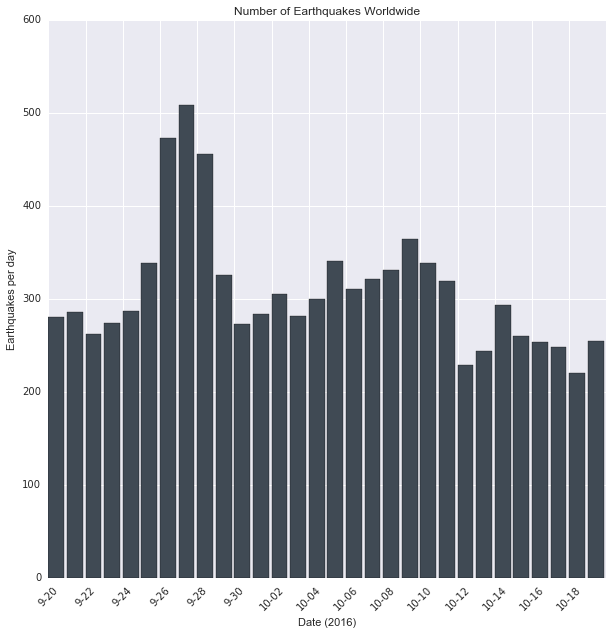

In [66]:
%matplotlib inline
# Let's create a bar chart!
# Creating a Bar Chart
# http://matplotlib.org/examples/api/barchart_demo.html

import numpy as np
import matplotlib.pyplot as plt

x_locations = np.arange(len(earthquakes_by_day))
bar_width = 0.85
bar_color = (64/255.0, 74/255.0, 84/255.0)

# Setting size of the plot
fig = plt.figure(figsize=(10, 10))

# Creating a bar chart
plt.bar(x_locations, earthquake_counts, bar_width, color=bar_color)

# Plot x axis values, rotate, plot _every other_ date for cleaner plot
plt.xticks(x_locations[::2], earthquake_dates[::2], rotation=45)

# Let's add some text labels to make this easier to read:

# Get the axis object
ax = fig.add_subplot(111)

ax.set_title("Number of Earthquakes Worldwide")
ax.set_ylabel("Earthquakes per day")
ax.set_xlabel("Date (2016)")

In [68]:
# It looks like there were a LOT of earthquakes 9-27 to 9-28
# Let's dig a bit deeper

# Let's count how many earthquakes there were
earthquake_places = client.count_unique("earthquakes",
    timeframe={
        "start": arrow.get(2016, 9, 27).format(),
        "end": arrow.get(2016, 9, 30).format()
    }
)

# How about earthquakes with a magnitude more than 1.0?

# What else can we try to find in this data?
# Where the most earthquakes were? This involves some geo tools
# How about Pandas work? Let's take this array and turn it into a Pandas DS.
# We can do things like find the mean magnitude
